In [16]:
from google.colab import files
uploaded = files.upload()

Saving crime_data.csv to crime_data (1).csv


**REQUIRED** **LIBRYERS**

In [17]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from numpy import random, float, array
from scipy.spatial.distance import cdist

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


Data Preprocessing 

In [18]:
Crime_data1=pd.read_csv("crime_data.csv")

In [19]:
Crime_data1

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [20]:
Crime_data1.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


# LabelEncoder

In [24]:
from sklearn import preprocessing 
lable_encoder = preprocessing.LabelEncoder()
Crime_data1["Unnamed: 0"]=lable_encoder.fit_transform(Crime_data1["Unnamed: 0"])

**# Normalization function **

In [21]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return(x)

# Normalized data frame (considering the numerical part of data)

In [25]:
Crime_data1_norm = norm_func(Crime_data1.iloc[:,1:])
Crime_data1_norm.describe()

,Murder,Assault,UrbanPop,Rape
count,50.000000,50.000000,50.000000,50.000000
mean,0.420964,0.430685,0.568475,0.360000
std,0.262380,0.285403,0.245335,0.242025
min,0.000000,0.000000,0.000000,0.000000
25%,0.197289,0.219178,0.381356,0.200904
50%,0.388554,0.390411,0.576271,0.330749
75%,0.629518,0.698630,0.775424,0.487726
max,1.000000,1.000000,1.000000,1.000000


In [26]:
Crime_data1.head(10)               # Top 10 rows

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,0,13.2,236,58,21.2
1,1,10.0,263,48,44.5
2,2,8.1,294,80,31.0
3,3,8.8,190,50,19.5
4,4,9.0,276,91,40.6
5,5,7.9,204,78,38.7
6,6,3.3,110,77,11.1
7,7,5.9,238,72,15.8
8,8,15.4,335,80,31.9
9,9,17.4,211,60,25.8


In [27]:
# How to find optimum number of  cluster
# The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion:

importing kmeans

In [28]:
from sklearn.cluster import KMeans

In [29]:
# ELBOW CURVE
# by plotting elbow method we can decide which k is best

In [30]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(Crime_data1_norm)
    wcss.append(kmeans.inertia_)

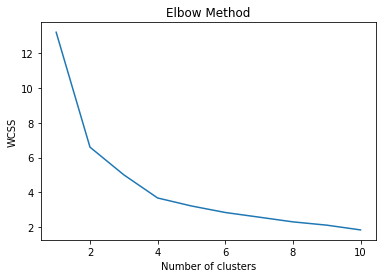

In [31]:
from matplotlib import pyplot as plt
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [33]:
model=KMeans(n_clusters=4)
model.fit(Crime_data1_norm)
model.labels_

array([0, 3, 3, 0, 3, 3, 1, 1, 3, 0, 1, 2, 3, 1, 2, 1, 1, 0, 2, 3, 1, 3,
       2, 0, 1, 2, 2, 3, 2, 1, 3, 3, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 3, 1,
       2, 1, 1, 2, 2, 1], dtype=int32)

In [34]:
kmeans.inertia_

1.8528270051870224

In [35]:
x=pd.Series(model.labels_)

In [36]:
Crime_data1['Clust']=x
Crime_data1

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,Clust
0,0,13.2,236,58,21.2,0
1,1,10.0,263,48,44.5,3
2,2,8.1,294,80,31.0,3
3,3,8.8,190,50,19.5,0
4,4,9.0,276,91,40.6,3
5,5,7.9,204,78,38.7,3
6,6,3.3,110,77,11.1,1
7,7,5.9,238,72,15.8,1
8,8,15.4,335,80,31.9,3
9,9,17.4,211,60,25.8,0


In [38]:
Crime_data1.iloc[:,1:5].groupby(Crime_data1.Clust).mean()

,Murder,Assault,UrbanPop,Rape
Clust,,,,
0,13.937500,243.625000,53.750000,21.412500
1,6.066667,139.388889,72.444444,19.166667
2,3.091667,76.000000,52.083333,11.833333
3,10.966667,264.000000,76.500000,33.608333


#Build Cluster algorithm

In [39]:
from sklearn.cluster import KMeans
clusters_new = KMeans(5, random_state=50)
clusters_new.fit(Crime_data1_norm)

KMeans(n_clusters=5, random_state=50)

In [40]:
clusters_new.labels_

array([3, 2, 2, 1, 2, 2, 0, 1, 2, 3, 0, 4, 2, 1, 4, 1, 1, 3, 4, 2, 0, 2,
       4, 3, 1, 4, 4, 2, 4, 0, 2, 2, 3, 4, 0, 1, 1, 0, 0, 3, 4, 3, 2, 0,
       4, 1, 0, 4, 4, 1], dtype=int32)

#Assign clusters to the data set

In [42]:
Crime_data1['Y'] = clusters_new.labels_

In [43]:
Crime_data1.shape
Crime_data1.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,Clust,Y
0,0,13.2,236,58,21.2,0,3
1,1,10.0,263,48,44.5,3,2
2,2,8.1,294,80,31.0,3,2
3,3,8.8,190,50,19.5,0,1
4,4,9.0,276,91,40.6,3,2


In [44]:
Crime_data1['Y'].value_counts()     

2    12
4    12
1    10
0     9
3     7
Name: Y, dtype: int64

In [45]:
#these are standardized values.

clusters_new.cluster_centers_

array([[0.25033467, 0.27549467, 0.81544256, 0.27103072],
       [0.3939759 , 0.38356164, 0.53050847, 0.33953488],
       [0.6124498 , 0.75      , 0.75423729, 0.67980189],
       [0.83562823, 0.70645793, 0.37772397, 0.37172388],
       [0.13805221, 0.10616438, 0.34039548, 0.1171404 ]])

In [46]:
Crime_data1.groupby('Y').agg(['mean']).reset_index()

,Y,Unnamed: 0,Murder,Assault,UrbanPop,Rape,Clust
,,mean,mean,mean,mean,mean,mean
0,0,29.222222,4.955556,125.444444,80.111111,17.788889,1.0
1,1,24.300000,7.340000,157.000000,63.300000,20.440000,0.9
2,2,16.833333,10.966667,264.000000,76.500000,33.608333,3.0
3,3,23.000000,14.671429,251.285714,54.285714,21.685714,0.0
4,4,29.666667,3.091667,76.000000,52.083333,11.833333,2.0
